# WIND ROSE DIAGRAM

Dalam pembuatan rose diagram, dibagi kepada 3 langkah yaitu
1. Input data dan cek data tersebut khususnya varibel yg buat dipanggil,terus pelajarin dulu dia dimensinya gimana 
2. Masukan data yang ada pada variabel dalam nc ke variabel buatan kita 
3. Hitung besaran dan arah 
4. buat rose diagram

In [1]:
#masukin library dulu 
from windrose import WindroseAxes
import netCDF4 as nc
import numpy as np
import pandas as pd
import math

## Input data Angin

In [2]:
#masukin lokasi .nc nya dimana
fn='angin1.nc'
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds=nc.Dataset(fn)
ds


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2020-09-20 09:29:37 GMT by grib_to_netcdf-2.18.0: grib_to_netcdf /data/scratch/20200920-0920/36/_mars-webmars-public-svc-green-007-6fe5cac1a363ec1525f54343b6cc9fd8-TtF7MO.grib -o /data/scratch/20200920-0920/7d/_grib2netcdf-webmars-public-svc-green-004-6fe5cac1a363ec1525f54343b6cc9fd8-0hseTR.nc -utime
    dimensions(sizes): longitude(57), latitude(41), time(124)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u10(time,latitude,longitude), int16 v10(time,latitude,longitude)
    groups: 

In [3]:
#data=pd.read_excel(r'D:/smt5/andat/praktikum/modul4 andat/Modul4.xlsx',sheets='Arus Rose and Feather')
#data_angin=pd.DataFrame(data, columns=['U (m/s)','V (m/s)'])
#display(data_angin)

## Deklarasi Variabel Data Angin
masukin variabel dalam nc ke variabel buatan kita sendiri

rose diagram itu, inputnya harus time series sedangkan pada input data kita tau kalo data yg di download merupakan data spasial makanya diambil deh satu kolom latitude dan longitudenya itu maksudnya ngambil 1 grid.

setiap orang dalam setiap kelompok diusahakan mengambil dari grid yang berbeda supaya dapat dilihat ketersesuaian data dalam satu daerah tersebut


In [4]:

u=ds.variables['u10'][:,1,1]
v=ds.variables['v10'][:,1,1]
lon=ds.variables['longitude'][:]
lat=ds.variables['latitude'][:]
time=ds.variables['time'][:]

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u))
print('dimensi v',np.shape(v))
print('dimensi lon',np.shape(lon))
print('dimensi lat',np.shape(lat))
print('dimensi time',np.shape(time))

dimensi u (124,)
dimensi v (124,)
dimensi lon (57,)
dimensi lat (41,)
dimensi time (124,)


In [5]:
#untuk melihat data
data_angin=pd.DataFrame(u,columns=['u'])
data_angin['v']=v
display(data_angin)

,u,v
0,4.442772,2.053509
1,3.270528,0.670593
2,3.565739,1.358177
3,4.729382,1.062259
4,4.869774,0.761914
...,...,...
119,0.521233,-3.042213
120,0.303431,-2.447242
121,0.618619,-3.096268
122,3.621230,-1.864262


## Besaran dan Arah Angin
untuk membuat rose diagram, data input nya harus berupa magnitudo dan arah

In [6]:

mag=[]
for i in range(len(data_angin)):
    rumuz=math.hypot(data_angin['u'].iloc[i],data_angin['v'].iloc[i])
    mag.append(rumuz)
data_angin['magnitude']=mag[:]

dir=[]
for i in range(len(data_angin)):
    rumus=360+(180/math.pi)*math.atan2(data_angin['u'].iloc[i],data_angin['v'].iloc[i])
    rumus=rumus%360
    dir.append(rumus)

data_angin['direction']=dir[:]

display(data_angin)

,u,v,magnitude,direction
0,4.442772,2.053509,4.894397,65.192981
1,3.270528,0.670593,3.338569,78.412608
2,3.565739,1.358177,3.815644,69.148346
3,4.729382,1.062259,4.847211,77.340970
4,4.869774,0.761914,4.929018,81.107719
...,...,...,...,...
119,0.521233,-3.042213,3.086542,170.277714
120,0.303431,-2.447242,2.465981,172.932019
121,0.618619,-3.096268,3.157462,168.701351
122,3.621230,-1.864262,4.072932,117.240069


## Membuat Wind Rose

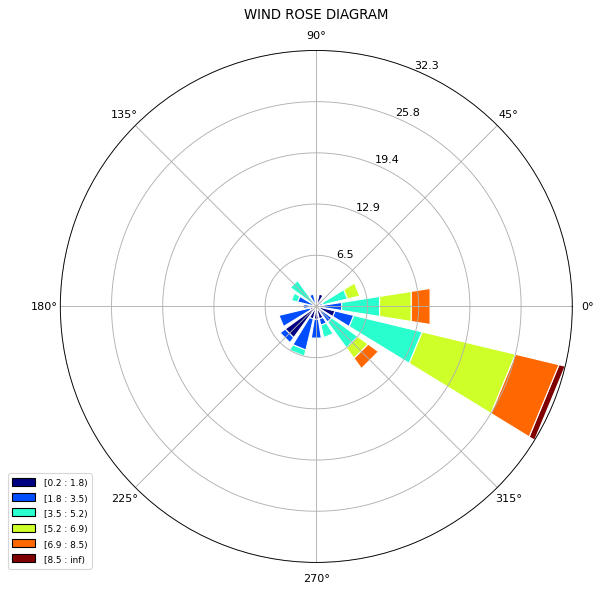

In [10]:
import matplotlib.pyplot as plt

ax = WindroseAxes.from_ax()
ax.bar(data_angin['direction'], data_angin['magnitude'], normed=True, opening=0.8, edgecolor='white', blowto=False)
ax.set_title('WIND ROSE DIAGRAM')
ax.set_legend(bbox_to_anchor=(-0.1, -0.01))
plt.savefig('ss.png',dpi=300)

# CURRENT ROSE DIAGRAM
## Input Data Arus

In [ ]:
#masukin lokasi .nc nya dimana
fn2='D:/smt7/asisten andat/3hrly.nc4'
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds2=nc.Dataset(fn2)
ds2


## Deklarasi Variabel Arus
grid yang dipilih pada arus u dan v sama kaya grid angin aja supaya diasumsikan tempatnya deketan

In [ ]:

u2=ds2.variables['water_u'][:,:,1,1]
v2=ds2.variables['water_v'][:,:,1,1]
lon2=ds2.variables['lon'][:]
lat2=ds2.variables['lat'][:]
time2=ds2.variables['time'][:]

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u2))
print('dimensi v',np.shape(v2))
print('dimensi lon',np.shape(lon2))
print('dimensi lat',np.shape(lat2))
print('dimensi time',np.shape(time2))

In [ ]:
#untuk melihat data
data_arus=pd.DataFrame(u2,columns=['u'])
data_arus['v']=v2
display(data_arus)

## Besaran dan Arah Arus

In [ ]:

mag2=[]
for i in range(len(data_arus)):
    rumuz2=math.hypot(data_arus['u'].iloc[i],data_arus['v'].iloc[i])
    mag2.append(rumuz2)
data_arus['magnitude']=mag2[:]

dir2=[]
for i in range(len(data_arus)):
    rumus2=360+(180/math.pi)*math.atan2(data_arus['u'].iloc[i],data_arus['v'].iloc[i])
    rumus2=rumus2%360
    dir2.append(rumus2)
data_arus['direction']=dir2[:]

display(data_arus)

## Membuat Current Rose

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(data_arus['direction'], data_arus['magnitude'], normed=True, opening=0.8, edgecolor='white', blowto=True)
ax.set_title('CURRENT ROSE DIAGRAM')
ax.set_legend(bbox_to_anchor=(-0.1, -0.01))